<a href="https://colab.research.google.com/github/MahnoorShahbaz/Credit-Card-Fraud-Detection/blob/main/notebooks/ML_Project_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import zipfile

# Define the zip file name
zip_file_name = 'archive (2).zip'

# Method 1: Reading directly with pandas (easiest if there's only one CSV inside)
# Pandas can often detect the compression automatically
try:
    df = pd.read_csv(zip_file_name)
    print("Dataset loaded successfully!")
except:
    # Method 2: If Method 1 fails, manually extract or specify the file
    with zipfile.ZipFile(zip_file_name, 'r') as z:
        # List all files in the zip to find the CSV name
        print("Files in zip:", z.namelist())
        csv_file_name = z.namelist()[0] # Usually 'creditcard.csv'
        with z.open(csv_file_name) as f:
            df = pd.read_csv(f)
            print(f"Loaded {csv_file_name} successfully!")

df.head()

Dataset loaded successfully!


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
import pandas as pd
import zipfile

# Specify the path to your zip file
zip_path = 'archive (2).zip'

# Use zipfile to open and read the CSV inside
with zipfile.ZipFile(zip_path, 'r') as z:
    # Identify the CSV file name inside the zip
    # This automatically finds the first file ending in .csv
    csv_file = [f for f in z.namelist() if f.endswith('.csv')][0]

    with z.open(csv_file) as f:
        df = pd.read_csv(f)

# The rest of your evaluation logic
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nInfo:")
df.info()  # info() prints by default

print("\nFirst 5 rows:")
# If you are in Colab/Jupyter, 'display' works. Otherwise, use print.
try:
    from IPython.display import display
    display(df.head())
except ImportError:
    print(df.head())

Shape: (284807, 31)

Columns:
 ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
print("Missing values per column:")
print(df.isnull().sum())
print("\nDescriptive statistics (numeric):")
display(df.describe().T)

Missing values per column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Descriptive statistics (numeric):


,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
n_dup = df.duplicated().sum()
print(f"Number of duplicate rows: {n_dup}")

if n_dup>0:
    display(df[df.duplicated()].head())

Number of duplicate rows: 1081


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0


In [8]:
df = df.drop_duplicates()
df.shape

(283726, 31)

In [9]:
class_counts = df['Class'].value_counts()
class_props = df['Class'].value_counts(normalize=True)
print("Counts:\n", class_counts)
print("\nProportions:\n", class_props)

Counts:
 Class
0    283253
1       473
Name: count, dtype: int64

Proportions:
 Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64


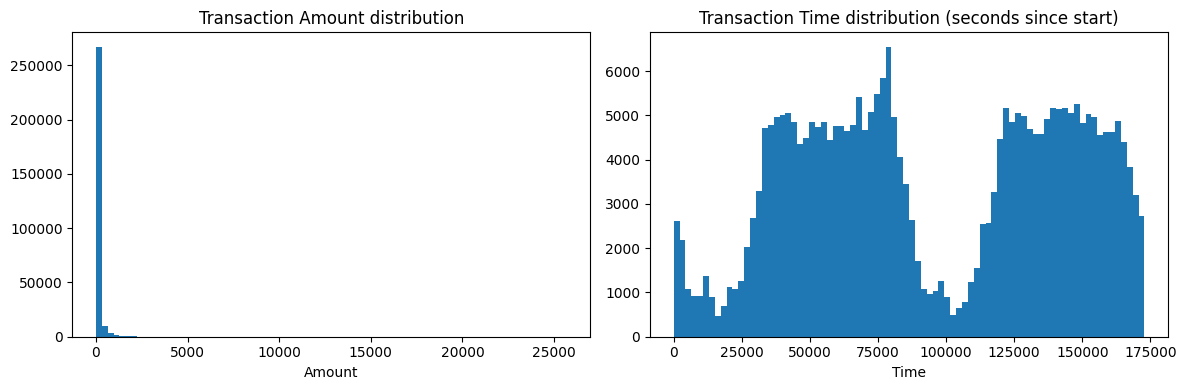

<Figure size 600x400 with 0 Axes>

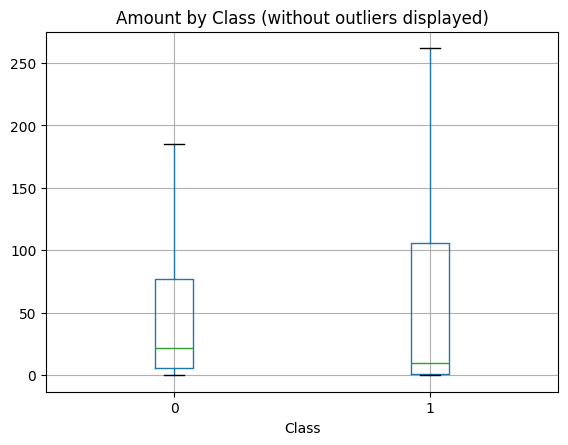

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(df['Amount'], bins=80)
plt.title('Transaction Amount distribution')
plt.xlabel('Amount')

plt.subplot(1,2,2)
plt.hist(df['Time'], bins=80)
plt.title('Transaction Time distribution (seconds since start)')
plt.xlabel('Time')

plt.tight_layout()
plt.show()

# Boxplot of Amount by Class (fraud vs non-fraud)
plt.figure(figsize=(6,4))
df.boxplot(column='Amount', by='Class', showfliers=False)
plt.title('Amount by Class (without outliers displayed)')
plt.suptitle('')
plt.show()


Top correlations with Class:
 Class    1.000000
V11      0.149067
V4       0.129326
V2       0.084624
V19      0.033631
V8       0.033068
V21      0.026357
V27      0.021892
V20      0.021486
V28      0.009682
Name: Class, dtype: float64

Bottom correlations with Class:
 V9    -0.094021
V1    -0.094486
V18   -0.105340
V7    -0.172347
V3    -0.182322
V16   -0.187186
V10   -0.206971
V12   -0.250711
V14   -0.293375
V17   -0.313498
Name: Class, dtype: float64


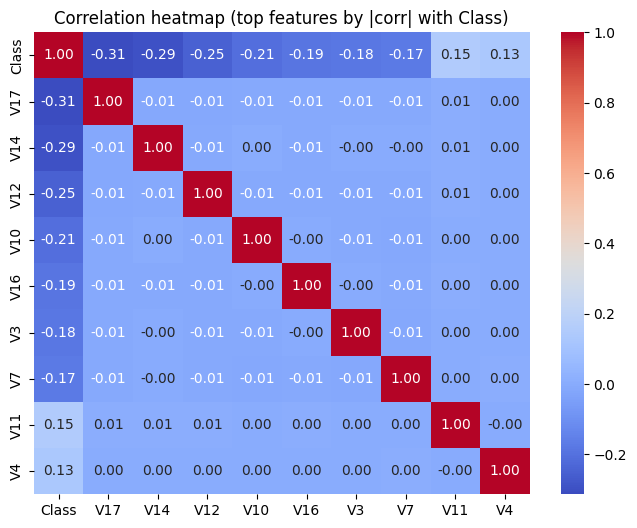

In [11]:
import seaborn as sns
corr_with_target = df.corr()['Class'].sort_values(ascending=False)
print("Top correlations with Class:\n", corr_with_target.head(10))
print("\nBottom correlations with Class:\n", corr_with_target.tail(10))

# Small heatmap of correlations for the top features by magnitude
top_feats = corr_with_target.abs().sort_values(ascending=False).head(10).index.tolist()
plt.figure(figsize=(8,6))
sns.heatmap(df[top_feats].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation heatmap (top features by |corr| with Class)')
plt.show()

In [12]:

from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train class distribution:\n", y_train.value_counts(normalize=True))
print("Test class distribution:\n", y_test.value_counts(normalize=True))

Train shape: (226980, 30) Test shape: (56746, 30)
Train class distribution:
 Class
0    0.998335
1    0.001665
Name: proportion, dtype: float64
Test class distribution:
 Class
0    0.998326
1    0.001674
Name: proportion, dtype: float64


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Copy data to avoid overwriting originals
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Fit on train, transform both
X_train_scaled[['Time', 'Amount']] = scaler.fit_transform(X_train[['Time', 'Amount']])
X_test_scaled[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])

X_train_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
226238,1.045499,2.238954,-1.724499,-2.151484,-2.577803,0.993668,3.565492,-1.785957,0.860122,-1.264003,...,-0.323810,-0.149574,-0.049333,0.278442,0.684735,-0.219028,-0.159167,0.037920,-0.049932,-0.229434
134253,-0.298690,-1.315062,1.630783,0.597001,-0.038359,-0.404580,-0.965712,0.212249,0.735381,-1.267926,...,-0.067580,-0.238898,-0.946773,0.323904,0.515632,-0.713000,-0.266503,-0.017794,0.051058,-0.331197
186465,0.678397,1.908801,0.021184,-2.087997,0.129310,1.161468,0.605244,-0.022371,0.180296,0.283819,...,-0.210474,0.293609,1.095842,-0.044874,-1.689517,0.106098,0.007758,0.045164,-0.053068,-0.298809
149493,-0.074929,1.811257,0.316556,0.316751,3.880231,0.048454,1.020163,-0.734868,0.233651,0.681423,...,-0.228032,0.138869,0.700422,0.174064,0.702997,-0.212523,-0.010018,-0.017740,-0.038006,-0.289247
18461,-1.376728,1.358817,-1.120881,0.550266,-1.547659,-1.194950,0.275448,-1.201843,0.212889,-2.094285,...,-0.361686,-0.340972,-0.636442,0.252758,-0.344160,-0.064282,-0.439622,0.062524,0.013095,-0.261985


In [14]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=2000, class_weight='balanced')

log_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=2000)

In [15]:
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score
)

# Predictions
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC
auc = roc_auc_score(y_test, y_prob)
print("\nROC-AUC Score:", auc)

Confusion Matrix:
[[55258  1393]
 [   12    83]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.87      0.11        95

    accuracy                           0.98     56746
   macro avg       0.53      0.92      0.55     56746
weighted avg       1.00      0.98      0.99     56746


ROC-AUC Score: 0.9658392242808925


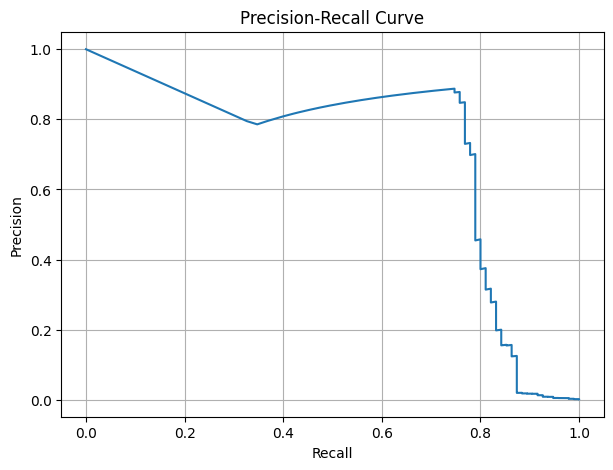

In [16]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(7,5))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()

In [17]:
import numpy as np
from sklearn.metrics import f1_score

thresholds = np.linspace(0, 1, 101)  # 0.00, 0.01, ..., 1.00

best_threshold = 0
best_f1 = 0

for t in thresholds:
    preds = (y_prob >= t).astype(int)
    f1 = f1_score(y_test, preds)

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print("Best Threshold:", best_threshold)
print("Best F1 Score:", best_f1)

Best Threshold: 0.99
Best F1 Score: 0.7177033492822966


In [18]:
optimal_pred = (y_prob >= best_threshold).astype(int)

print("Confusion Matrix (optimal threshold):")
print(confusion_matrix(y_test, optimal_pred))

print("\nClassification Report:")
print(classification_report(y_test, optimal_pred))

print("\nROC-AUC Score (unchanged):", roc_auc_score(y_test, y_prob))

Confusion Matrix (optimal threshold):
[[56612    39]
 [   20    75]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.66      0.79      0.72        95

    accuracy                           1.00     56746
   macro avg       0.83      0.89      0.86     56746
weighted avg       1.00      1.00      1.00     56746


ROC-AUC Score (unchanged): 0.9658392242808925


In [19]:
importance = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': log_reg.coef_[0]
})

# Sort by absolute value of coefficient
importance['abs_value'] = importance['coefficient'].abs()
importance = importance.sort_values(by='abs_value', ascending=False)

importance.head(15)

,feature,coefficient,abs_value
29,Amount,1.566254,1.566254
14,V14,-1.550486,1.550486
12,V12,-1.251263,1.251263
10,V10,-1.133602,1.133602
17,V17,-1.000425,1.000425
22,V22,0.910053,0.910053
4,V4,0.853285,0.853285
20,V20,-0.848393,0.848393
1,V1,0.700324,0.700324
16,V16,-0.645591,0.645591


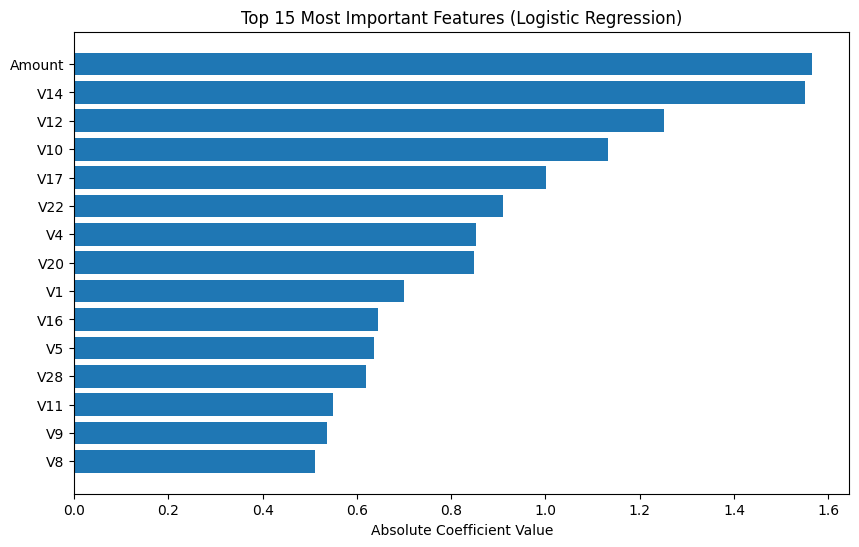

In [20]:
plt.figure(figsize=(10,6))
plt.barh(importance['feature'][:15], importance['abs_value'][:15])
plt.gca().invert_yaxis()
plt.title("Top 15 Most Important Features (Logistic Regression)")
plt.xlabel("Absolute Coefficient Value")
plt.show()